# Nalaganje osnovnih paketov
pandas: data analisys library


In [1]:
import pandas as pd

# Vhodni podatki in vizualizacija (Data understanding)


**Nalaganje dataset-a**

preverimo ali smo pravilno naložili dataset

In [2]:
!ls /kaggle/input/apple-quality

apple_quality.csv


Preberemo CSV datoteko in prikažemo prvih nekaj vrstic naloženega dataset-a. Ogled prvih nekaj vrstic ponuja začetni vpogled v stolpce in podatke.

raw_data ... podatki v Pandas DataFrame obliki

In [3]:
filename = "/kaggle/input/apple-quality/apple_quality.csv"
raw_data = pd.read_csv(filename)
raw_data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


**Vizualizacija**

Ukaz *.info()* ponuja kratek povzetek DataFrame-a, ki prikazuje tipe stolpcev, število neničelnih vrednosti in splošno porabo pomnilnika. Iz rezultatov je očitno, da v mojih podatkih ničenih vrednosti ni.

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


Ukaz *.describe()* nam omogoča vpogled v osnovne statistične vrednosti naših podatkov. Spodaj pa so vrednosti podatkov predstavljene še v histogramih za lažjo vizualizacijo. Iz njiju je razvidna porazdelitev vrednosti podatkov in pa njihov razpon.

In [5]:
raw_data.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


array([[<Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Sweetness'}>,
        <Axes: title={'center': 'Crunchiness'}>],
       [<Axes: title={'center': 'Juiciness'}>,
        <Axes: title={'center': 'Ripeness'}>]], dtype=object)

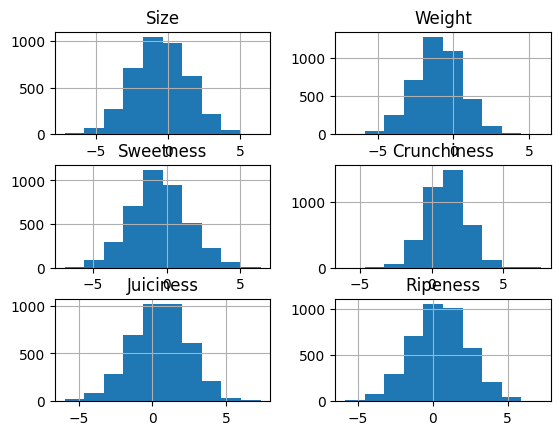

In [6]:
raw_data.drop(columns=["A_id"]).hist()

**Priprava podatkov**

Zaradi klasifikacijskih algoritmov, ki jih bom v nadaljevanju uporabila, je dobra odločitev, da odstranim stolpec "A-id". Oba algortima bi se lahko, če enolični identifikator pustim v podatkih, naučila predvidevat o končni kvalifikaciji z njegovo pomočjo, ki pa v resnici nima povezave na to ali je jabolko dobro ali ne.

In [7]:
data = raw_data.drop(columns=["A_id"])
data.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


Zgoraj lahko opazimo, da je v stolpcu Acidity ena vrstica več kot pri ostalih.

In [8]:
data["Acidity"]

0                            -0.491590483
1                            -0.722809367
2                             2.621636473
3                             0.790723217
4                             0.501984036
                      ...                
3996                          1.854235285
3997                         -1.334611391
3998                         -2.229719806
3999                          1.599796456
4000    Created_by_Nidula_Elgiriyewithana
Name: Acidity, Length: 4001, dtype: object

Ker je 4000. vrstica moteča in bi mi v prihodnosti povzročala veliko težav, jo bom izbrisala.

In [9]:
data = data.drop(index=4000)
data["Acidity"]

0       -0.491590483
1       -0.722809367
2        2.621636473
3        0.790723217
4        0.501984036
            ...     
3995     0.137784369
3996     1.854235285
3997    -1.334611391
3998    -2.229719806
3999     1.599796456
Name: Acidity, Length: 4000, dtype: object

# Modeliranje

## Naive Bayes

Naive Bayes je nabor metod za nadzorovano učenje, ki temeljijo na Bayesovem izreku s predpostavko o pogojni neodvisnosti med parametri. </br>
Bayesov izrek:</br></br>
        P(Y∣X) = ( P(X∣Y) * P(Y) ) / P(X)</br></br>

Ker so moji podatki zvezni in iz zgornjih histogramov je razvidno da so v normalni porazdelitvi, sem se odločila za uporabo algoritma Gaussian Naive Bayes. 

Spodnja koda uvozi razreda train_test_split in GaussianNB iz knjižnice *scikit-learn*. Prvi nam omogoča deljenje podatkov v skupini za treniranje in testiranje. Slednji pa je klasifikacijski algoritem Gaussian Naive Bayes.


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

Ker ima scikit-learn težave z interpretiranjem dtype object v razredu, bom stolpec Quality spremenila v int ("good"==1, "bad"==0).

In [11]:
data["Quality"]

0       good
1       good
2        bad
3       good
4       good
        ... 
3995     bad
3996    good
3997     bad
3998    good
3999    good
Name: Quality, Length: 4000, dtype: object

In [12]:
data["Quality"] = data["Quality"].map({"good": 1, "bad": 0})
data["Quality"]

0       1
1       1
2       0
3       1
4       1
       ..
3995    0
3996    1
3997    0
3998    1
3999    1
Name: Quality, Length: 4000, dtype: int64

Spodnja koda loči ciljno spremenljivko (Quality) v Y in shrani preostale vrednosti v X. Model mora napovedati, ali je jabolko kakovostno ali ne, zato vrednost Quality ohranimo kot našo izhodno spremenljivko (Y). Preostale podatke uporabimo kot vhodne značilnosti (X) za učenje modela.

In [13]:
Y = data["Quality"]
X = data.drop(columns=["Quality"])

Y.head()

0    1
1    1
2    0
3    1
4    1
Name: Quality, dtype: int64

In [14]:
X.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036


Koda razdeli vrednosti spremenljivk (X) in razreda (Y) v učno in testno skupino, tako da za testiranje uporabi 20% podatkov. Razdelitev podatkov zagotavlja, da imamo ločene nabore za učenje in ocenjevanje delovanja modela. Z nastavitvijo fiksnega random_state omogočimo ponovljivost razdelitve za dosledne rezultate pri vsakem ponavljanju.

In [15]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=12)

In [16]:
train_X.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000
mean,-0.486127,-0.962210,-0.500357,0.971063,0.520517,0.490001
std,1.925434,1.594456,1.925915,1.404146,1.947829,1.861065
min,-6.905803,-7.149848,-5.958315,-6.055058,-5.961897,-5.864599
25%,-1.800593,-1.971981,-1.772397,0.052404,-0.814694,-0.765048
50%,-0.485574,-0.951315,-0.533888,0.978620,0.580381,0.487710
75%,0.839710,0.083999,0.772464,1.877179,1.846293,1.747032
max,6.406367,4.738227,5.612644,7.619852,7.364403,7.237837


In [17]:
test_X.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,-0.570566,-1.098892,-0.350965,1.043136,0.478523,0.531383
std,1.938259,1.630745,2.008810,1.396574,1.859261,1.927783
min,-7.151703,-6.556685,-6.894485,-4.495359,-5.544053,-5.611400
25%,-1.879265,-2.087606,-1.613262,0.155195,-0.719510,-0.799577
50%,-0.612517,-1.106378,-0.414633,1.095643,0.418372,0.609667
75%,0.684390,-0.164458,0.947628,1.948051,1.746573,1.831942
max,5.866232,5.790714,6.374916,6.110621,5.812242,6.346445


In [18]:
train_Y.info()

<class 'pandas.core.series.Series'>
Index: 3200 entries, 3655 to 1867
Series name: Quality
Non-Null Count  Dtype
--------------  -----
3200 non-null   int64
dtypes: int64(1)
memory usage: 50.0 KB


### Učenje/Treniranje
Spodnja koda ustvari Gaussov naivni Bayesov klasifikator (gnb), ki ga nato nauči na učnih podatkih z uporabo metode prileganja ( *gnb.fit(train_X, train_Y)* ).

In [19]:
gnb = GaussianNB()
gnb.fit(train_X, train_Y)

GaussianNB()

### Testiranje
Spodnja koda uporablja zgoraj naučen model za generiranje napovedi (pred_y) za testne podatke (test_X) in nato prikaže napovedane vrednosti. Z napovedmi za test_X lahko vidimo, kako dobro model deluje na podatkih, ki jih še ni videl. S primerjavo napovedanih razredov z dejanskimi lahko ocenimo kakovost delovanjea modela.

In [20]:
pred_y = gnb.predict(test_X)
pred_y

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,

S spodnjo kodo uvozimo več metrik (accuracy_score, classification_report in confusion_matrix) iz scikit-learn za pomoč pri ocenjevanju učinkovitosti klasifikacijskega modela.

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Koda *accuracy_score* natančnost napovedi prikaže tako, da primerja predvideno klasifikacijo (`pred_y`) z dejanskimi razredi (`test_Y`).
To je preprost in hiter način za merjenje splošne pravilnosti modela, čeprav so za razumevanje delovanja na neuravnoteženih naborih podatkov morda potrebne druge pristope merjenja natančnosti.

In [22]:
acc = accuracy_score(test_Y, pred_y)
acc

0.7725

Natančnost našega modela je 77%, kar pomeni da pravilno klasificira malo več kot 3/4 vseh primerov. Za začetek našega merjenja to ni slabo, v nadaljevanju pa bomo videli, ali dodatne metrike, kot so precision, recall in F1-score, koristne za razumevanje, v katerih specifičnih primerih se model slabše odziva.

Spodnja koda ustvari poročilo o klasifikaciji, ki podrobno opisuje natančnost, odpoklic, F1-oceno in podporo za vsak razred. Zagotavlja popolnejše razumevanje delovanja modela kot zgolj natančnost in nas usmerja pri izboljšavah za prihodnje učenje.
</br>precision -> (točnost) procent pravilnih znotraj napovedanega razreda: TP / (TP + FP)
</br>recall -> (pokritost) procent pravilno napovedanih znotraj resničnih klasifikacij: TP / (TP + FN)
</br>F1-score -> harmonično povprečje med precision in recall, uporaben pri neuravnoteženih razredih
</br>support -> koliko dejanskih primerov določenega razreda je bilo v testnem naboru podatkov

In [23]:
report = classification_report(test_Y, pred_y)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       393
           1       0.78      0.76      0.77       407

    accuracy                           0.77       800
   macro avg       0.77      0.77      0.77       800
weighted avg       0.77      0.77      0.77       800



Model je razred napovedal pravilno 76% in 78%. Identificiral je pravilen razred 78% in 76%. Oba razreda sta uravnoteženo predstavljana. Ker so si rezultati med obema razredoma podobna, je razvidno da model ni pristranski do enega izmed razredov.</br>
Ker pa ciljamo na višjo točnost napovedovanja, bom v nadaljevanju uporabila še druge modele klasifikacije.

Spodnji ukaz ustvari "confusion matrix" s primerjavo dejanskih razredov (test_Y) z napovedanimi modela (pred_y). Matrika prikazuje nov pogled na naše rezultate: število resnično pozitivnih, resnično negativnih, lažno pozitivnih in lažno negativnih rezultatov. To pomaga pri prepoznavanju specifičnih področij, kjer model deluje dobro ali kje potrebuje izboljšave.

In [24]:
confusion_matrix(test_Y, pred_y)

array([[308,  85],
       [ 97, 310]])

(diagonala so pravilni, ostala dva so napačne napovedi)

## Artificial neural network (Nevronska mreža)

Nevronska mreža, tudi umetna nevronska mreža, je naprava za obdelavo informacij, ki deluje po vzoru človeških/živalskih možganov. Bistvo nevronskih mrež je v tem, da med učenjem same ugotovijo pravilo, ki povezuje izhodne podatke z vhodnimi (samostojno učenje).</br>

Nevronsko mrežo sestavljajo enote ali vozlišča, imenovana nevroni, ki so med seboj povezani z robovi, ki modelirajo sinapse v možganih. Vsak nevron prejema signale iz povezanih nevronov, jih nato obdela in pošlje signal drugim povezanim nevronom. "Signal" je realno število, izhod vsakega nevrona pa se izračuna z neko nelinearno funkcijo vsote njegovih vhodov, imenovano aktivacijska funkcija. Moč signala na vsaki povezavi je določena z utežjo, ki se prilagaja med procesom učenja.</br>

Običajno so nevroni združeni v plasti. Signali potujejo od prve plasti (*input layer*) do zadnje plasti (*output layer*), po možnosti skozi več vmesnih plasti (*hidden layers*).

Knjižnico, ki jo bom uporabila, je *tensorflow*. Spodaj navedeni razredi imajo vsak svojo vlogo:
</br>
</br>
Sequential -> ustvari linearni sklad plasti, kjer ima vsaka plast natanko en vhodni tenzor in en izhodni tenzor (količina, ki se lahko izrazi s kvadratno matriko števil)
</br>
Input -> definira vhodne podatke
</br>
Dense -> upravljanje s plastmi, ki so med seboj popolnoma povezanepovezane (vsak nevron povezan z vsakim nevronom v prejšnji plasti). Poleg tega pa s tem razredom definiramo želeno aktivacijsko funkcijo
</br>
SGD -> Stochastic Gradient Descent: optimizira uteži med učenjem/treniranjem
</br>
</br>
Na vajah smo sicer uporabljali še dva druga razreda (nista iz te knjižnice), ampak sem se na podlagi svojih podatkov odločila, da ju ne bom potrebovala.</br>
Prvi je SMOTE (knjižnica *imblearn*), ki je koristen, ko so klacifikacijski razredi neuravnovešeni. V mojih podatkih sta oba razreda ("good", "bad") predstavljena v pribljižno enakem številu primerov.</br>
Drugi razred je StandardScaler (knjižnica *scikit-learn*), ki je namenjena v primerih, ko so podatki numerični in v različnih merilih. Ker pa so moji podatki v povprečju raporejeni med -7 in 7 ter so znotraj lastnosti/stolpcev v naravni porazdelitvi, ne potrebujem standardizacije.

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD

### Učenje/Treniranje

Spodnja koda sestavi "feedforward" nevronsko mrežo. V inputu layer številka 7 predstavlja 7 lastnosti, ki jih pri vsakem jabolku opazujemo.</br>
Naslednje 4 vrstice predstavljajo hidden layers. Odločila sem se za 2 plasti s 32 nevroni in 2 plasti s 16. Iz poskusov sem ugotovila, da je to ena boljših kombinacij. Prvi vseh štirih sem uporabila ReLU (rectified linear unit) aktivacijsko funkcijo. Funkcija izniči negativne vrednosti (jih spremeni v 0), če pa je vrednost pozitivna se je ne dotika.</br>
Zadnja vrstica je output layer, v katerem imam samo en nevron in aktivacijsko funkcijo sigmoid. Ta funkcija razdeli podatke med 0 in 1, kar pri klasifikaciji med "good" in "bad" iščemo.

In [26]:
model = Sequential()
model.add(Input((7,)))

model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

V spodnji kodi se naš model uči na danih podatkih.</br>
Loss function, ki smo jo uporabljali na vajah, sem uporabila tudi v svojem primeru. Imenuje se binary_crossentropy in je primerna za binarno klasifikacijo s katero se ukvarja moj projekt. Loss function podaja podatek o tem kako napačna je napoved modela v primerjavi s pravilno rešitvijo (višja kot je ocena, slabše gre modelu). Model si z rezultatom te funkcije pomaga pri prilagajanju uteži.</br>
Za optimizator uporabljam SGD algoritem, ki pomaga "kontrolirati" loss function. Uteži modela prilagaja postopoma, posledično se s tem lažje izognemu problemu prekomernega prilagajanja.</br>
Zadnji argument modelu pove naj med učenjem ocenjuje točnost podatkov.</br></br>
Spodnja funkcija pa je v resnici začne proces učenja na naših podatkih. Število epochs-ov (število iteracij) sem nastavila na 50, saj je to prinašalo največjo točnost na končnih napovedi.

In [27]:
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
model.fit(train_X, train_Y, epochs=50)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5703 - loss: 0.6803
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7674 - loss: 0.5835
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7981 - loss: 0.4843
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8058 - loss: 0.4323
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8283 - loss: 0.3866
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8250 - loss: 0.3789
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8407 - loss: 0.3652
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8458 - loss: 0.3377
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8577 - loss: 0.3277
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8603 - loss: 0.3270
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8719 - loss: 0.3070
Epoch 12/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

### Testiranje

Spodjna koda naš naučen model testira na podatkih, s katerimi se še ni srečal prej.  Zakomentiran del kode nam vrne array števil med 0 in 1, ki predstavlja vrjetnost, da je jabolko dobro ("good"). 



In [28]:
ann_pred = model.predict(test_X)
#ann_pred

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


Glede na to, da števila predstavljajo vrjetnost tega, da je jabolko dobro, lahko s pomočjo spodnje funkcije, array verjetnosti spremenimo array boolean (True-> "good", False-> "bad").

In [29]:
ann_pred = ann_pred > 0.5
#ann_pred

S spodnjo kodo preverimo točnost modela.

In [30]:
acc = accuracy_score(test_Y, ann_pred)
acc

0.92125

Moj cilj je vsaj 90% pravilnost napovedi. Pri nevronskih mrežah se z vsakim ponovnim pogomnom programa uteži nastavijo malo drugače, se posledično spreminja tudi natančnost. Program sem pognala petkrat in to so rezultati:</br>
0.91625</br>
0.90875</br>
0.90375</br>
0.9</br>
0.925</br>
Iz njih je vidno, da prihaja do sprememb, a se natančnost nikoli ne spusti pod 90%, kar pa je bil cilj mojega projekta.



S spodnjo kodo lahko bolj natančno razumemo razporeditev naših rezultatov napovedi. Koda je enaka kot pri Naive Bayes, kjer je tudi razložena.

In [31]:
class_rep = classification_report(test_Y, ann_pred)
print(class_rep)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       393
           1       0.92      0.93      0.92       407

    accuracy                           0.92       800
   macro avg       0.92      0.92      0.92       800
weighted avg       0.92      0.92      0.92       800



In [32]:
confusion_matrix(test_Y, ann_pred)

array([[358,  35],
       [ 28, 379]])

# Viri

Osnove strojnega učenja in podatkovnega rudarjenja: FAMNIT</br>

https://scikit-learn.org/stable/modules/naive_bayes.html</br>
https://sl.wikipedia.org/wiki/Bayesov_izrek</br>
https://www.geeksforgeeks.org/machine-learning/gaussian-naive-bayes/</br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html</br>
https://en.wikipedia.org/wiki/Neural_network_(machine_learning)</br>
https://en.wikipedia.org/wiki/Activation_function</br>
https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html</br>
https://keras.io/api/models/model_training_apis/</br>
https://en.wikipedia.org/wiki/Rectifier_(neural_networks)</br>

# GitHub

Povezava do projekta: https://github.com/m2rij2/KKJ

## 